In [12]:
"""
CASE STUDY 
NYC Yellow Taxi Fare Analytics using Linear Regression 
"""
# Part A: Data Understanding and Cleaning
import pandas as pd

# Load dataset (sampled due to large dataset)
df=pd.read_csv("taxi_data.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12748981,1,2015-01-10 19:01:44,2015-01-10 19:05:40,2,1.00,-73.951988,40.786217,1,N,-73.953735,40.775162,1,5.5,0.0,0.5,1.25,0.0,0.3,7.55
12748982,1,2015-01-10 19:01:44,2015-01-10 19:07:26,2,0.80,-73.982742,40.728184,1,N,-73.974976,40.720013,1,6.0,0.0,0.5,2.00,0.0,0.3,8.80
12748983,1,2015-01-10 19:01:44,2015-01-10 19:15:01,1,3.40,-73.979324,40.749550,1,N,-73.969101,40.787800,2,13.5,0.0,0.5,0.00,0.0,0.3,14.30
12748984,1,2015-01-10 19:01:44,2015-01-10 19:17:03,1,1.30,-73.999565,40.738483,1,N,-73.981819,40.737652,1,10.5,0.0,0.5,2.25,0.0,0.3,13.55


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12748986 entries, 0 to 12748985
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RateCodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.8+ GB


In [14]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274899e+07,1.274898e+07,1.274899e+07
mean,1.521437e+00,1.681491e+00,1.345913e+01,-7.256184e+01,3.997282e+01,1.036901e+00,-7.260904e+01,3.999961e+01,1.386712e+00,1.190566e+01,3.082790e-01,4.977986e-01,1.853814e+00,2.434984e-01,2.831431e-01,1.510829e+01
std,4.995402e-01,1.337924e+00,9.844094e+03,1.012510e+01,5.578691e+00,6.732240e-01,9.966037e+00,5.487742e+00,4.988611e-01,1.030254e+01,5.916643e-01,3.534229e-02,1.106432e+03,1.527171e+00,6.908633e-02,1.106503e+03
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.219258e+02,0.000000e+00,1.000000e+00,-7.401667e+02,-9.029157e+00,1.000000e+00,-4.500000e+02,-7.900000e+01,-5.000000e-01,-9.242000e+01,-2.600000e+01,0.000000e+00,-4.503000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399168e+01,4.073554e+01,1.000000e+00,-7.399120e+01,4.073436e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.160000e+00
50%,2.000000e+00,1.000000e+00,1.680000e+00,-7.398160e+01,4.075314e+01,1.000000e+00,-7.397976e+01,4.075362e+01,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01
75%,2.000000e+00,2.000000e+00,3.000000e+00,-7.396662e+01,4.076757e+01,1.000000e+00,-7.396246e+01,4.076880e+01,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.060000e+00,0.000000e+00,3.000000e-01,1.630000e+01
max,2.000000e+00,9.000000e+00,1.542000e+07,7.866265e+01,4.047000e+02,9.900000e+01,8.527402e+01,4.595333e+02,5.000000e+00,4.008000e+03,9.999900e+02,5.000000e-01,3.950589e+06,1.450090e+03,3.000000e-01,3.950612e+06


In [15]:
# Keep relevant columns
data=df[['trip_distance','fare_amount','passenger_count']]
data

,trip_distance,fare_amount,passenger_count
0,1.59,12.0,1
1,3.30,14.5,1
2,1.80,9.5,1
3,0.50,3.5,1
4,3.00,15.0,1
...,...,...,...
12748981,1.00,5.5,2
12748982,0.80,6.0,2
12748983,3.40,13.5,1
12748984,1.30,10.5,1


In [16]:
# Remove invalid rows
data=data[(data['trip_distance']>0)&(data['fare_amount']>0)]
data = data[data['trip_distance'] < 50]
data = data[data['fare_amount'] < 200]

In [17]:
# Correlation 
print("Correlation\n:",data.corr())

Correlation
:                  trip_distance  fare_amount  passenger_count
trip_distance         1.000000     0.954417         0.010770
fare_amount           0.954417     1.000000         0.009061
passenger_count       0.010770     0.009061         1.000000


In [18]:
# Part B: Simple Linear Regression (One Feature)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np

X = data[['trip_distance']]
y = data['fare_amount']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train,y_train)

y_pred = model_simple.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print("Slope:",model_simple.coef_[0])
print("Intercept:",model_simple.intercept_)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)
print("R2:",r2)

Slope: 2.735631563022331
Intercept: 4.206525648898515
MSE: 8.329362346068121
MAE: 1.4644874295205388
RMSE: 2.8860634688218694
R2: 0.9106374655926526


In [22]:
# Part C: Multiple Linear Regression

X_multi = data[['trip_distance','passenger_count']]
y = data['fare_amount']

X_train_m,X_test_m,y_train_m,y_test_m = train_test_split(X_multi,y,test_size=0.2,random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train_m,y_train_m)

y_pred_m = model_multi.predict(X_test_m)

print("Coefficients:",model_multi.coef_)
print("Intercept:",model_multi.intercept_)
print("R2:",r2_score(y_test_m,y_pred_m))

Coefficients: [ 2.73566903 -0.00874995]
Intercept: 4.221152878942563
R2: 0.9106389635333689


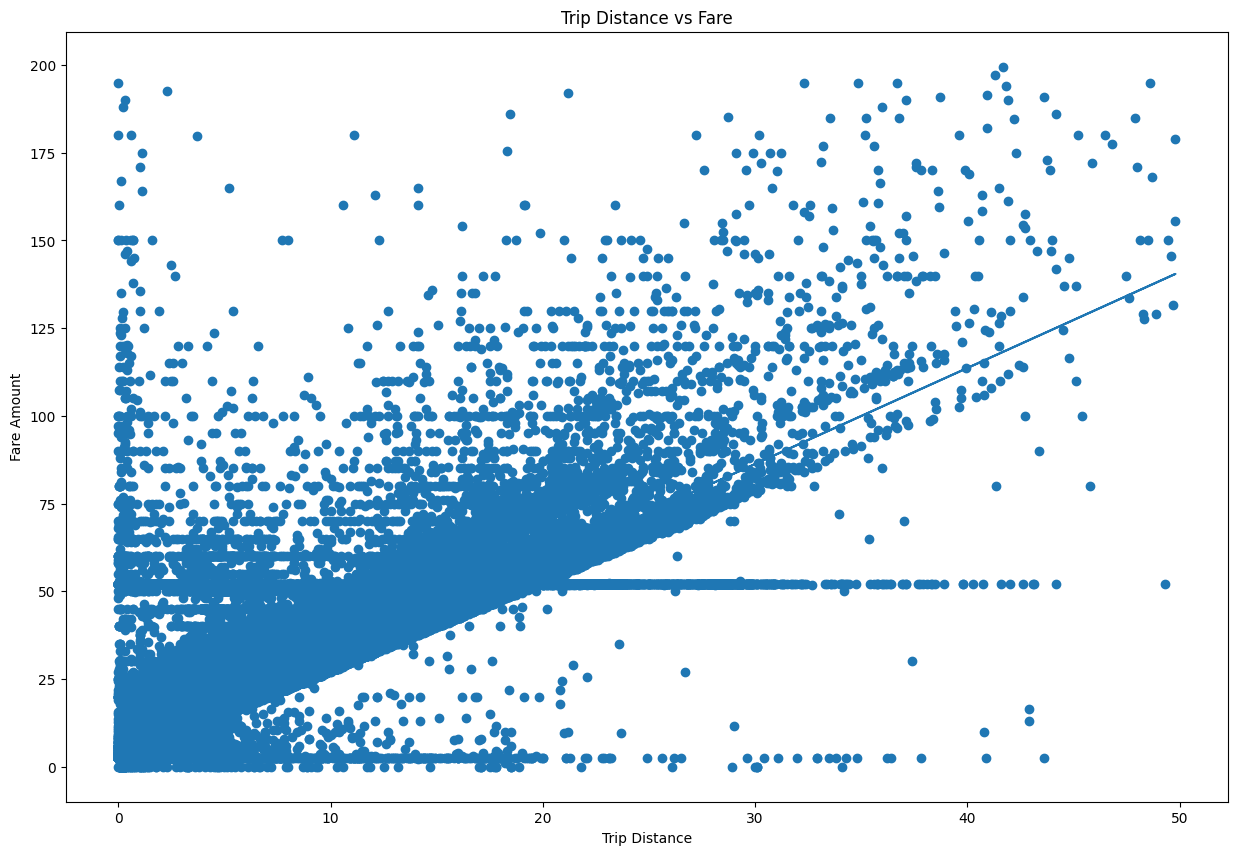

In [27]:
# Part D: Visualization and Assumption Check

import matplotlib.pyplot as plt

# Scatter + Regression Line
plt.figure(figsize=(15,10))
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)
plt.title("Trip Distance vs Fare")
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.show()

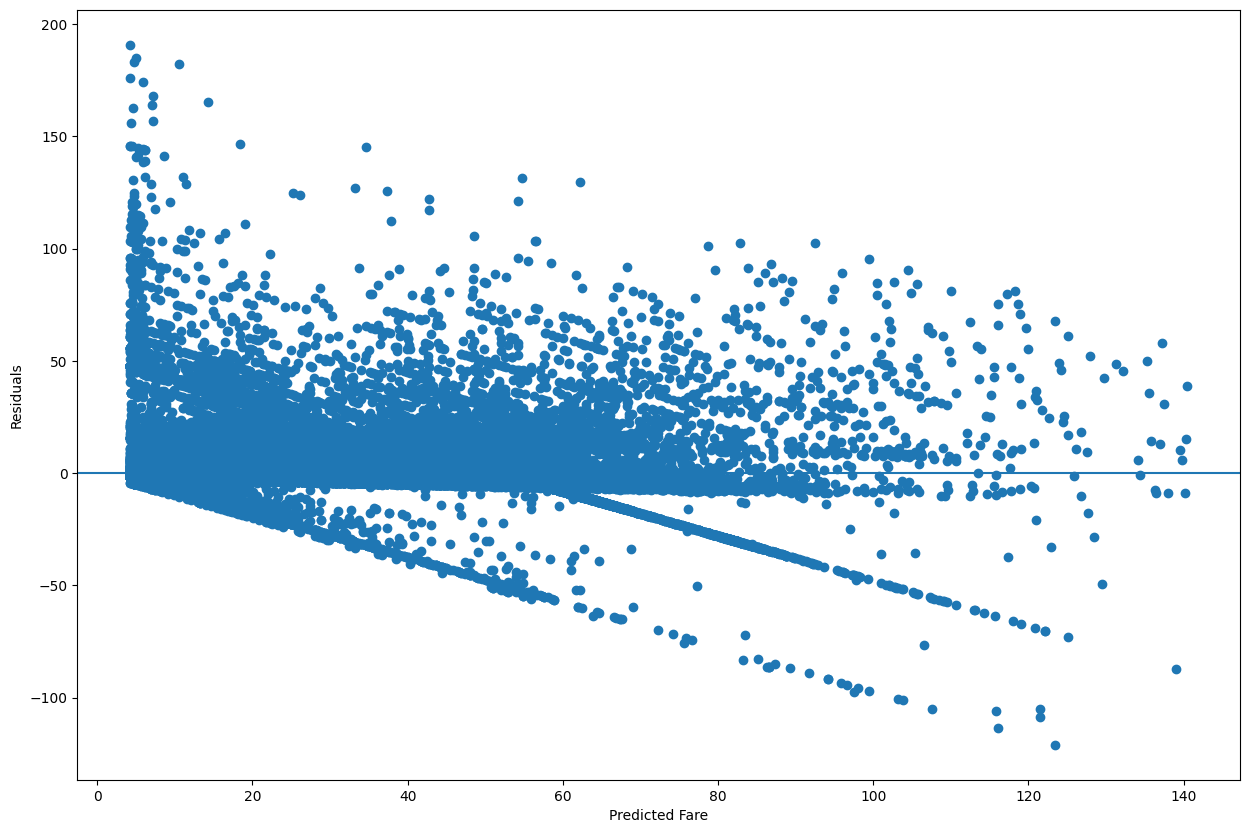

In [28]:
# Residual Plot

plt.figure(figsize=(15,10))
residuals=y_test - y_pred
plt.scatter(y_pred,residuals)
plt.axhline(0)
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.show()